In [2]:
import pandas as pd
import numpy as np
import sklearn

In [56]:
def score_for_range(start, end, predictions, actual):
    x = 0
    accurate = 0
    for  i in range(len(predictions)):
        if predictions[i] > start and predictions[i] < end:
            if actual[i] == 1:
                accurate += 1
            x = x + 1
    print('[{},{}]'.format(round(start, 2), round(end,2)))
    print(x)
    if x == 0: return 0, 0
    return (accurate / x), x

In [57]:
data = pd.read_csv("data.csv")
data.head()

,Name,FrontShoes,RearShoes,AmericanStyleCart,CoachName,DriverName,Distance,StartTrack,Sire,StartTime,StartType,Day,Month,Year,Winner,Odds
0,Loikkaus,HAS_SHOES,HAS_SHOES,False,Henna Latvala,Hannu Hietanen,2100,1,Apassi,1514823300000,CAR_START,1,1,2018,False,7.85
1,R.R. Samu,HAS_SHOES,HAS_SHOES,False,Erkki Jämsä,Mika Forss,2100,2,Suikun Ero,1514823300000,CAR_START,1,1,2018,False,3.88
2,Ekopetus,HAS_SHOES,HAS_SHOES,False,Antti Isomaa,Ville Pohjola,2100,3,A.T. Eko,1514823300000,CAR_START,1,1,2018,False,28.20
3,Huuger,HAS_SHOES,HAS_SHOES,False,Satu Siikamäki,Niko Jokela,2100,4,Viesker,1514823300000,CAR_START,1,1,2018,False,8.21
4,Wauhti,HAS_SHOES,HAS_SHOES,False,Veli-Erkki Paavola,Veli-Erkki Paavola,2100,5,Valtraus,1514823300000,CAR_START,1,1,2018,False,2.45


In [58]:
data.Winner = data.Winner.astype(int)
data.AmericanStyleCart = data.AmericanStyleCart.astype(int)
data.FrontShoes = data.FrontShoes.replace(to_replace=['NO_SHOES', 'HAS_SHOES', 'UNKNOWN'], value=[0, 1, -1])
data.RearShoes = data.RearShoes.replace(to_replace=['NO_SHOES', 'HAS_SHOES', 'UNKNOWN'], value=[0, 1, -1])
data.StartType = data.StartType.replace(to_replace=['CAR_START', 'VOLT_START'], value=[0, 1])


In [59]:
coach_df = pd.read_csv('coaches.csv')
driver_df = pd.read_csv('drivers.csv')
horse_df = pd.read_csv('horses.csv')

driver_df.columns = ['name', 'count',  'wins',  'winsPerRace',   'meanOdds',  'oddsTotal']
coach_df.columns = ['name', 'count',  'wins',  'winsPerRace',   'meanOdds',  'oddsTotal']
horse_df.columns = ['name', 'count',  'wins',  'winsPerRace',   'meanOdds',  'oddsTotal']

#print(driver_df.head())

x = driver_df.loc[driver_df['name'] == 'Ulf Ohlsson']
print(x.winsPerRace)

0    0.154888
Name: winsPerRace, dtype: float64


In [60]:

coachWprList = []
driverWprList = []
horseWprList = []

coaches = {}
drivers = {}
horses = {}

for i, row in data.iterrows():
    coachName = row['CoachName']
    driverName = row['DriverName']
    horseName = row['Name']
    
    if driverName not in drivers:
        driverWpr = (driver_df.loc[driver_df['name'] == driverName]).winsPerRace
        drivers.update({driverName: driverWpr})
    else:
        driverWpr = drivers[driverName]
    
    if coachName not in coaches:
        coachWpr = (coach_df.loc[coach_df['name'] == coachName]).winsPerRace
        coaches.update({coachName: coachWpr})
    else:
        coachWpr = coaches[coachName] 
        
    if horseName not in horses:
        horseWpr = (horse_df.loc[horse_df['name'] == horseName]).winsPerRace
        horses.update({horseName: horseWpr})
    else:
        horseWpr = horses[horseName] 
        
    driverWprList.append(driverWpr)
    coachWprList.append(coachWpr)
    horseWprList.append(horseWpr)


In [61]:
data['driverWpr'] = [driverWprList[i].values[0] for i in range(len(driverWprList))]
data['coachWpr'] = [coachWprList[i].values[0] for i in range(len(coachWprList))]
data['horseWpr'] = [horseWprList[i].values[0] for i in range(len(horseWprList))]

In [62]:
data.head()



,Name,FrontShoes,RearShoes,AmericanStyleCart,CoachName,DriverName,Distance,StartTrack,Sire,StartTime,StartType,Day,Month,Year,Winner,Odds,driverWpr,coachWpr,horseWpr
0,Loikkaus,1,1,0,Henna Latvala,Hannu Hietanen,2100,1,Apassi,1514823300000,0,1,1,2018,0,7.85,0.128536,0.048780,0.048780
1,R.R. Samu,1,1,0,Erkki Jämsä,Mika Forss,2100,2,Suikun Ero,1514823300000,0,1,1,2018,0,3.88,0.147361,0.019608,0.033333
2,Ekopetus,1,1,0,Antti Isomaa,Ville Pohjola,2100,3,A.T. Eko,1514823300000,0,1,1,2018,0,28.20,0.110599,0.049296,0.087175
3,Huuger,1,1,0,Satu Siikamäki,Niko Jokela,2100,4,Viesker,1514823300000,0,1,1,2018,0,8.21,0.111872,0.071429,0.071429
4,Wauhti,1,1,0,Veli-Erkki Paavola,Veli-Erkki Paavola,2100,5,Valtraus,1514823300000,0,1,1,2018,0,2.45,0.122905,0.230392,0.205128


In [64]:
copy = data.copy()


car_X = copy.loc[(copy['StartType'] == 0)] 
volt_X = copy.loc[(copy['StartType'] == 1)] 
columns_to_remove = ['Sire', 'CoachName', 'DriverName', 'StartTime', 'Year', 'Day', 'Name', 'Winner', 'Odds', 'StartType', 'horseWpr']


car_X.head()


,Name,FrontShoes,RearShoes,AmericanStyleCart,CoachName,DriverName,Distance,StartTrack,Sire,StartTime,StartType,Day,Month,Year,Winner,Odds,driverWpr,coachWpr,horseWpr
0,Loikkaus,1,1,0,Henna Latvala,Hannu Hietanen,2100,1,Apassi,1514823300000,0,1,1,2018,0,7.85,0.128536,0.048780,0.048780
1,R.R. Samu,1,1,0,Erkki Jämsä,Mika Forss,2100,2,Suikun Ero,1514823300000,0,1,1,2018,0,3.88,0.147361,0.019608,0.033333
2,Ekopetus,1,1,0,Antti Isomaa,Ville Pohjola,2100,3,A.T. Eko,1514823300000,0,1,1,2018,0,28.20,0.110599,0.049296,0.087175
3,Huuger,1,1,0,Satu Siikamäki,Niko Jokela,2100,4,Viesker,1514823300000,0,1,1,2018,0,8.21,0.111872,0.071429,0.071429
4,Wauhti,1,1,0,Veli-Erkki Paavola,Veli-Erkki Paavola,2100,5,Valtraus,1514823300000,0,1,1,2018,0,2.45,0.122905,0.230392,0.205128


In [65]:
car_y = car_X.Winner
volt_y = volt_X.Winner

for column in columns_to_remove:
    del car_X[column]
    del volt_X[column]

In [66]:
car_X.head()

,FrontShoes,RearShoes,AmericanStyleCart,Distance,StartTrack,Month,driverWpr,coachWpr
0,1,1,0,2100,1,1,0.128536,0.048780
1,1,1,0,2100,2,1,0.147361,0.019608
2,1,1,0,2100,3,1,0.110599,0.049296
3,1,1,0,2100,4,1,0.111872,0.071429
4,1,1,0,2100,5,1,0.122905,0.230392


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [68]:
X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(car_X, car_y, test_size=0.2, random_state=42)
X_train_volt, X_test_volt, y_train_volt, y_test_volt = train_test_split(volt_X, volt_y, test_size=0.2, random_state=42)

In [69]:
import seaborn as sns

In [70]:
car_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=0)
car_model.fit(X_train_car, y_train_car)
volt_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=0)
volt_model.fit(X_train_volt, y_train_volt)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

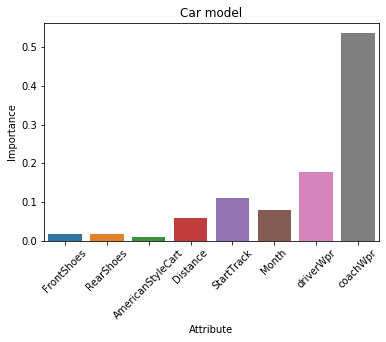

In [90]:
car_importance_df = pd.DataFrame({'Attribute' : car_X.columns, 'Importance': car_model.feature_importances_})
bar = sns.barplot(x = 'Attribute', y='Importance', data=car_importance_df )
bar.set_title('Car model')
for item in bar.get_xticklabels():
    item.set_rotation(45)
bar.get_figure().savefig("car_importance.png")

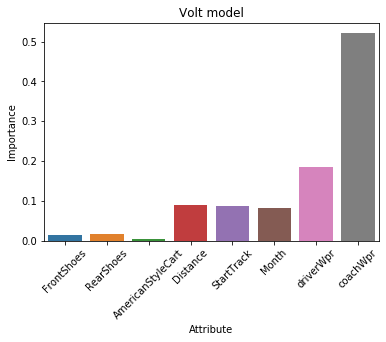

In [91]:
volt_importance_df = pd.DataFrame({'Attribute' : volt_X.columns, 'Importance': volt_model.feature_importances_})
bar = sns.barplot(x = 'Attribute', y='Importance', data=volt_importance_df )
bar.set_title('Volt model')
for item in bar.get_xticklabels():
    item.set_rotation(45)
bar.get_figure().savefig("volt_importance.png")

In [72]:
print(volt_model.feature_importances_)
volt_X.head()

[0.01489943 0.0155575  0.00467957 0.08996464 0.08619524 0.08246366
 0.18561932 0.52062064]


,FrontShoes,RearShoes,AmericanStyleCart,Distance,StartTrack,Month,driverWpr,coachWpr
154,1,1,0,2140,1,1,0.057971,0.014925
155,1,1,0,2140,2,1,0.044248,0.016484
156,1,1,0,2140,3,1,0.030488,0.117647
157,1,1,0,2140,4,1,0.087121,0.060606
158,1,1,0,2140,5,1,0.061404,0.117647


In [82]:
import pickle

In [83]:
pickle.dump( car_model, open( "car_model.p", "wb" ) )
pickle.dump( volt_model, open( "volt_model.p", "wb" ) )

In [75]:
car_predictions = car_model.predict(X_test_car)
volt_predictions = volt_model.predict(X_test_volt)

In [76]:
car_percentages = []#[round(i, 2) for i in np.arange(0.15, 1, 0.1)]
car_scores = []
for i in np.arange(0.0, 1, 0.1):
    score, occurences = score_for_range(i, (i + 0.1), car_predictions, y_test_car.values)
    if score > 0 and occurences >= 50:
        car_percentages.append(i + 0.05)
        car_scores.append(score)
        
volt_percentages = []#[round(i, 2) for i in np.arange(0.15, 1, 0.1)]
volt_scores = []
for i in np.arange(0.0, 1, 0.1):
    score, occurences = score_for_range(i, (i + 0.1), volt_predictions, y_test_volt.values)
    if score > 0 and occurences >= 50:
        volt_percentages.append(i + 0.05)
        volt_scores.append(score)

[0.0,0.1]
14297
[0.1,0.2]
8476
[0.2,0.3]
2043
[0.3,0.4]
492
[0.4,0.5]
62
[0.5,0.6]
14
[0.6,0.7]
15
[0.7,0.8]
5
[0.8,0.9]
1
[0.9,1.0]
0
[0.0,0.1]
11394
[0.1,0.2]
5644
[0.2,0.3]
1488
[0.3,0.4]
445
[0.4,0.5]
84
[0.5,0.6]
12
[0.6,0.7]
5
[0.7,0.8]
2
[0.8,0.9]
0
[0.9,1.0]
0


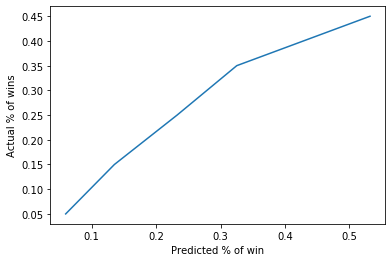

In [80]:
car_plot_df = pd.DataFrame({'Actual % of wins' : car_percentages, 'Predicted % of win': car_scores})
ax = sns.lineplot(x='Predicted % of win', y='Actual % of wins', data=car_plot_df)
ax.get_figure().savefig("car_start_score.png")

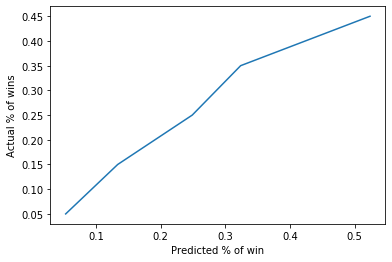

In [81]:
volt_plot_df = pd.DataFrame({'Actual % of wins' : volt_percentages, 'Predicted % of win': volt_scores})
ax = sns.lineplot(x='Predicted % of win', y='Actual % of wins', data=volt_plot_df)
ax.get_figure().savefig("volt_start_score.png")

In [81]:
x = 0
accurate = 0
for  i in range(len(predictions)):
    if predictions[i] > 0.50 and predictions[i] < 0.6:
        #print(predictions[i])
        #predictions[i] = 1
        print('Actual: ' + str(y_test.values[i]) + ' Predicted: ' + str(predictions[i]))
        if y_test.values[i] == 1:
            accurate += 1
        x = x + 1
        #val = predictions[i] * X_test["Odds"].values[i]
        #print("Predicition: " + str(predictions[i]) + ", Odds: " + str(X_test["Odds"].values[i]) + " = " + str(val) + ", Winner: " + str(y_test.values[i]))
    #else:
        #predictions[i] = 0
    
print(accurate)
print(x)

Actual: 0 Predicted: 0.5387576870288505
Actual: 0 Predicted: 0.5353213330996912
Actual: 1 Predicted: 0.5018453666207146
Actual: 1 Predicted: 0.5391678722950948
Actual: 1 Predicted: 0.5208371766778055
Actual: 1 Predicted: 0.5100788166539545
Actual: 1 Predicted: 0.5804326899775549
Actual: 1 Predicted: 0.5305656991449929
Actual: 1 Predicted: 0.5005986738407863
Actual: 1 Predicted: 0.5365244243446413
Actual: 1 Predicted: 0.5884876080635191
Actual: 1 Predicted: 0.5674342203045744
Actual: 1 Predicted: 0.5917287728334609
Actual: 1 Predicted: 0.5035259111538143
Actual: 1 Predicted: 0.5128817801834032
Actual: 0 Predicted: 0.5511989622370251
Actual: 0 Predicted: 0.5761263779323037
Actual: 1 Predicted: 0.5732717568962246
Actual: 1 Predicted: 0.5209121575010615
Actual: 1 Predicted: 0.5488005929185431
Actual: 0 Predicted: 0.5300531652125823
Actual: 0 Predicted: 0.512804836506736
Actual: 0 Predicted: 0.532310789538025
Actual: 1 Predicted: 0.5562454593436416
Actual: 0 Predicted: 0.5719012875979429
Ac

In [36]:
horses = data.horseWpr
win_classes = []

for winRate in horses:
    if winRate > 0.5:
        win_classes.append(1)
    elif winRate > 0.25:
        win_classes.append(2)
    elif winRate > 0.1:
        win_classes.append(3)
    else:
        win_classes.append(4)
data['win_class'] = win_classes